In [1]:
%matplotlib inline
import sys
sys.path.append('../../Transformer')
import os
import numpy as np
import torch
import dill
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe
from helper import *
import visualization

## Load nuScenes SDK and data

In [2]:
nuScenes_data_path = "../../data/sets/nuscenes/v1.0"
nuScenes_devkit_path = './devkit/python-sdk/'
sys.path.append(nuScenes_devkit_path)
from nuscenes.map_expansion.map_api import NuScenesMap
nusc_map = NuScenesMap(dataroot=nuScenes_data_path, map_name='boston-seaport')

In [3]:
line_colors = ['#375397','#80CBE5','#ABCB51','#F05F78', '#C8B0B0']

# Map Encoding Demo

In [4]:
with open('../processed_data/nuScenes_test_map_full.pkl', 'rb') as f:
    eval_env = dill.load(f, encoding='latin1')
eval_scenes = eval_env.scenes

In [5]:
ph = 6
log_dir = './models'

In [38]:
model_dir = os.path.join(log_dir, 'CNN_transformer') 
eval_stg, hyp = load_model(model_dir, eval_env, ts=20)


Loading from ./models/CNN_transformer/model_registrar-20.pt
Loaded!



In [39]:
scene = eval_scenes[25]
scene.name

'105'

In [40]:
# Define ROI in nuScenes Map
x_min = 773.0
x_max = 1100.0
y_min = 1231.0
y_max = 1510.0

In [41]:
layers = ['drivable_area',
          'road_segment',
          'lane',
          'ped_crossing',
          'walkway',
          'stop_line',
          'road_divider',
          'lane_divider']

## Prediction including With Map Encoding

../../Transformer/environment/map.py:129: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  angles = torch.tensor(rotation)


future :  [[ 868.124 1394.647]
 [ 868.124 1394.647]
 [ 868.124 1394.647]
 [ 868.124 1394.647]
 [ 868.124 1394.647]
 [ 868.124 1394.647]]
pred :  [[[[ 868.13851929 1394.6426239 ]
   [ 868.13457489 1394.64260864]
   [ 868.15278625 1394.65744019]
   [ 868.14759064 1394.66716003]
   [ 868.17729187 1394.64622498]
   [ 868.18286896 1394.64884949]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


future :  [[ 861.83880705 1396.10308345]]
pred :  [[[[ 861.60404205 1396.66220093]
   [ 860.15037537 1394.67269897]
   [ 858.5371933  1392.48474121]
   [ 857.05683136 1390.2910614 ]
   [ 855.60125732 1388.12329102]
   [ 854.23399353 1385.95950317]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


future :  [[ 892.22105983 1412.06523367]
 [ 891.01024446 1412.62601339]
 [ 889.61682359 1413.20455647]
 [ 887.76580704 1413.99023464]
 [ 885.82939773 1414.71510772]]
pred :  [[[[ 892.64842987 1411.98298645]
   [ 892.2243042  1412.29631042]
   [ 891.93276978 1412.54336548]
   [ 891.45389557 1412.87437439]
   [ 891.13591766 1413.1129303 ]
   [ 890.80828857 1413.34115601]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


future :  [[ 942.70189758 1386.08099627]
 [ 947.0027827  1384.92231369]
 [ 951.33824634 1383.87586689]
 [ 954.9369968  1383.08539074]
 [ 958.64955858 1382.23909595]
 [ 962.36318136 1381.47891334]]
pred :  [[[[ 941.7179718  1386.58308411]
   [ 944.9684906  1385.95236206]
   [ 948.98248291 1384.94926453]
   [ 951.89543152 1384.34164429]
   [ 955.19050598 1383.55889893]
   [ 958.54881287 1382.85296631]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


future :  [[ 863.81996745 1418.12774041]
 [ 865.31954459 1415.09289446]
 [ 866.31804207 1412.18588605]
 [ 866.93580634 1409.04833215]
 [ 867.13459339 1405.16565644]]
pred :  [[[[ 863.22710419 1419.42871094]
   [ 864.60273743 1417.5771637 ]
   [ 865.95729065 1415.52770996]
   [ 867.14057922 1413.8441925 ]
   [ 868.07491302 1412.34643555]
   [ 869.01577759 1410.91786194]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


future :  [[ 881.48786551 1415.59350372]
 [ 879.84093915 1415.55608254]
 [ 878.06586437 1415.1344139 ]
 [ 876.36546976 1414.487905  ]
 [ 874.29037951 1413.53135498]
 [ 872.32292563 1412.32489657]]
pred :  [[[[ 881.99997711 1415.52334595]
   [ 881.3924942  1415.60406494]
   [ 880.71019745 1415.67771912]
   [ 880.27349854 1415.75325012]
   [ 879.94960022 1415.78181458]
   [ 879.48101807 1415.85548401]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


future :  [[ 902.19805609 1399.88073638]
 [ 906.66980528 1397.94591911]
 [ 911.22150026 1396.09845835]
 [ 915.66196923 1394.39198325]
 [ 920.0394441  1392.82205795]
 [ 924.23833395 1391.35956796]]
pred :  [[[[ 900.32245636 1401.38768005]
   [ 903.50213623 1400.36190796]
   [ 906.49433899 1399.42330933]
   [ 909.22901917 1398.68240356]
   [ 912.05754089 1398.0332489 ]
   [ 915.34590149 1397.23298645]]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


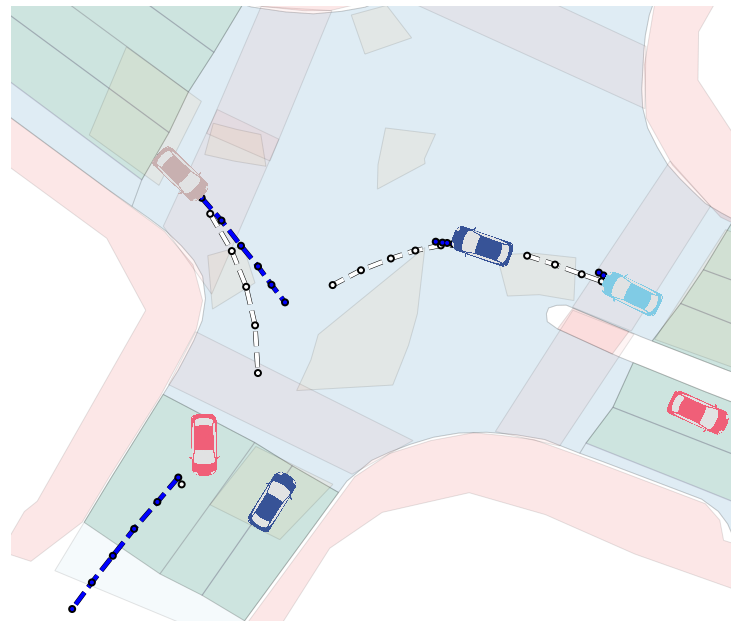

In [42]:
ph = 6
with torch.no_grad():
    timestep = np.array([10])
    predictions, _ = eval_stg.predict(scene,
                                       timestep,
                                       ph)

#     predictions_mm = eval_stg.predict(scene,
#                                       timestep,
#                                       ph,
#                                       num_samples=1,
#                                       z_mode=True,
#                                       gmm_mode=True)

    # Plot predicted timestep for random scene in map
    my_patch = (x_min, y_min, x_max, y_max)
    fig, ax = nusc_map.render_map_patch(my_patch, layers, figsize=(10, 10), alpha=0.1, render_egoposes_range=False)

    ax.plot([], [], 'ko-',
            zorder=620,
            markersize=4,
            linewidth=2, alpha=0.7, label='Ours (MM)')

    ax.plot([],
            [],
            'w--o', label='Ground Truth',
            linewidth=3,
            path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])

    plot_vehicle_nice(ax,
                      predictions,
                      scene.dt,
                      max_hl=10,
                      ph=ph,
                      map=None, x_min=x_min, y_min=y_min)

#     plot_vehicle_mm(ax,
#                     predictions_mm,
#                     scene.dt,
#                     max_hl=10,
#                     ph=ph,
#                     map=None, x_min=x_min, y_min=y_min)

    ax.set_ylim((1385, 1435))
    ax.set_xlim((850, 900))
    leg = ax.legend(loc='upper right', fontsize=20, frameon=True)
    ax.axis('off')
    for lh in leg.legendHandles:
        lh.set_alpha(.5)
    ax.get_legend().remove()
    fig.show()
    fig.savefig('plots/qual_nuScenes_map_pos.pdf', dpi=300, bbox_inches='tight')

## Prediction including With Map Encoding

## Prediction without Map Encoding

In [ ]:
model_dir = os.path.join(log_dir, 'int_ee') 
eval_stg_nm, hyp = load_model(model_dir, eval_env, ts=12)

In [ ]:
ph = 6
with torch.no_grad():
    timestep = np.array([2])
    predictions = eval_stg_nm.predict(scene,
                                   timestep,
                                   ph,
                                   num_samples=500)

    predictions_mm = eval_stg_nm.predict(scene,
                                      timestep,
                                      ph,
                                      num_samples=1,
                                      z_mode=True,
                                      gmm_mode=True)

    # Plot predicted timestep for random scene in map
    my_patch = (x_min, y_min, x_max, y_max)
    fig, ax = nusc_map.render_map_patch(my_patch, layers, figsize=(10, 10), alpha=0.1, render_egoposes_range=False)

    ax.plot([], [], 'ko-',
            zorder=620,
            markersize=4,
            linewidth=2, alpha=0.7, label='Ours (MM)')

    ax.plot([],
            [],
            'w--o', label='Ground Truth',
            linewidth=3,
            path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])

    plot_vehicle_nice(ax,
                      predictions,
                      scene.dt,
                      max_hl=10,
                      ph=ph,
                      map=None, x_min=x_min, y_min=y_min)

    plot_vehicle_mm(ax,
                    predictions_mm,
                    scene.dt,
                    max_hl=10,
                    ph=ph,
                    map=None, x_min=x_min, y_min=y_min)

    ax.set_ylim((1385, 1435))
    ax.set_xlim((850, 900))
    leg = ax.legend(loc='upper right', fontsize=20, frameon=True)
    ax.axis('off')
    for lh in leg.legendHandles:
        lh.set_alpha(.5)
    ax.get_legend().remove()
    fig.show()
    fig.savefig('plots/qual_nuScenes_no_map_pos.pdf', dpi=300, bbox_inches='tight')

## Prediction using velocity output

In [18]:
model_dir = os.path.join(log_dir, 'ee_vel') 
eval_stg_vel, hyp = load_model(model_dir, eval_env, ts=12)


Loading from ./models/ee_vel/model_registrar-12.pt
Loaded!



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


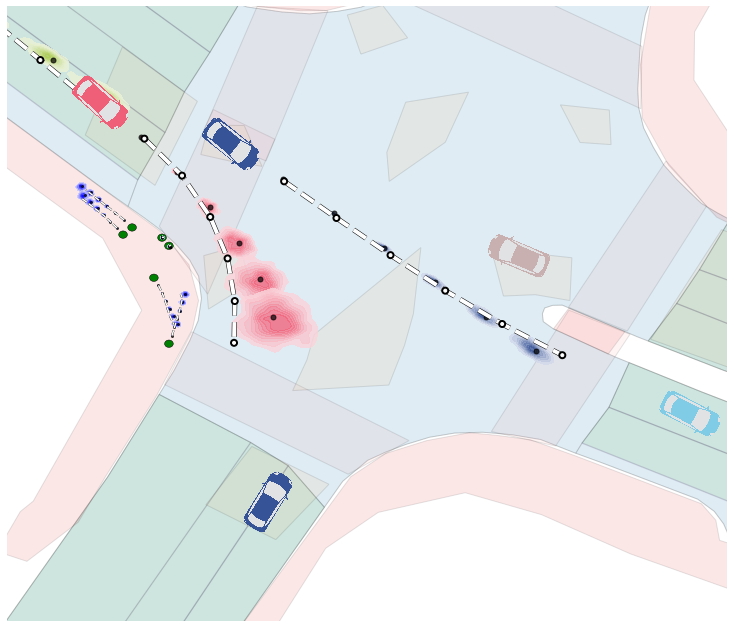

In [19]:
ph = 6
with torch.no_grad():
    timestep = np.array([2])
    predictions = eval_stg_vel.predict(scene,
                                   timestep,
                                   ph,
                                   num_samples=500)

    predictions_mm = eval_stg_vel.predict(scene,
                                      timestep,
                                      ph,
                                      num_samples=1,
                                      z_mode=True,
                                      gmm_mode=True)

    # Plot predicted timestep for random scene in map
    my_patch = (x_min, y_min, x_max, y_max)
    fig, ax = nusc_map.render_map_patch(my_patch, layers, figsize=(10, 10), alpha=0.1, render_egoposes_range=False)

    ax.plot([], [], 'ko-',
            zorder=620,
            markersize=4,
            linewidth=2, alpha=0.7, label='Ours (MM)')

    ax.plot([],
            [],
            'w--o', label='Ground Truth',
            linewidth=3,
            path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])

    plot_vehicle_nice(ax,
                      predictions,
                      scene.dt,
                      max_hl=10,
                      ph=ph,
                      map=None, x_min=x_min, y_min=y_min)

    plot_vehicle_mm(ax,
                    predictions_mm,
                    scene.dt,
                    max_hl=10,
                    ph=ph,
                    map=None, x_min=x_min, y_min=y_min)

    ax.set_ylim((1385, 1435))
    ax.set_xlim((850, 900))
    leg = ax.legend(loc='upper right', fontsize=20, frameon=True)
    ax.axis('off')
    for lh in leg.legendHandles:
        lh.set_alpha(.5)
    ax.get_legend().remove()
    fig.show()
    fig.savefig('plots/qual_nuScenes_no_map_vel.pdf', dpi=300, bbox_inches='tight')

## Prediction using velocity output and map

In [15]:
model_dir = os.path.join(log_dir, 'me_vel') 
eval_stg_vel_map, hyp = load_model(model_dir, eval_env, ts=12)


Loading from ./models/me_vel/model_registrar-12.pt
Loaded!



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


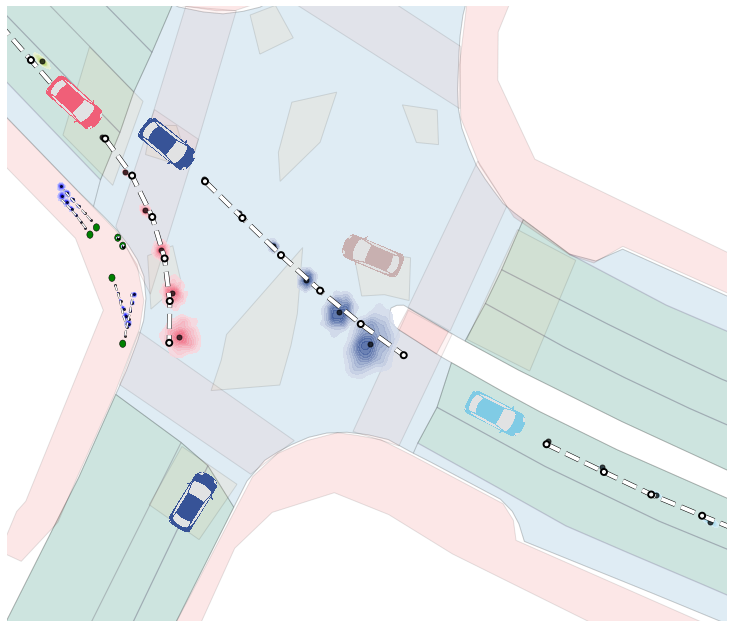

In [17]:
ph = 6
with torch.no_grad():
    timestep = np.array([2])
    predictions = eval_stg_vel_map.predict(scene,
                                   timestep,
                                   ph,
                                   num_samples=500)

    predictions_mm = eval_stg_vel_map.predict(scene,
                                      timestep,
                                      ph,
                                      num_samples=1,
                                      z_mode=True,
                                      gmm_mode=True)

    # Plot predicted timestep for random scene in map
    my_patch = (x_min, y_min, x_max, y_max)
    fig, ax = nusc_map.render_map_patch(my_patch, layers, figsize=(10, 10), alpha=0.1, render_egoposes_range=False)

    ax.plot([], [], 'ko-',
            zorder=620,
            markersize=4,
            linewidth=2, alpha=0.7, label='Ours (MM)')

    ax.plot([],
            [],
            'w--o', label='Ground Truth',
            linewidth=3,
            path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])

    plot_vehicle_nice(ax,
                      predictions,
                      scene.dt,
                      max_hl=10,
                      ph=ph,
                      map=None, x_min=x_min, y_min=y_min)

    plot_vehicle_mm(ax,
                    predictions_mm,
                    scene.dt,
                    max_hl=10,
                    ph=ph,
                    map=None, x_min=x_min, y_min=y_min)

    ax.set_ylim((1385, 1435))
    ax.set_xlim((850, 900))
    leg = ax.legend(loc='upper right', fontsize=20, frameon=True)
    ax.axis('off')
    for lh in leg.legendHandles:
        lh.set_alpha(.5)
    ax.get_legend().remove()
    fig.show()
    fig.savefig('plots/qual_nuScenes_map_vel.pdf', dpi=300, bbox_inches='tight')

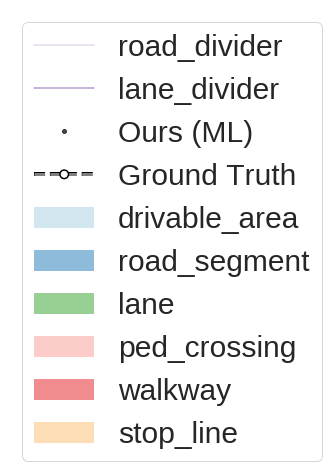

In [10]:
my_patch = (0, 0, 1, 1)
fig, ax = nusc_map.render_map_patch(my_patch, layers, figsize=(1, 1), alpha=0.1, render_egoposes_range=False)
ax.plot([], [], 'ko',
            zorder=620,
            markersize=4,
            linewidth=2, alpha=0.7, label='Ours (ML)')

ax.plot([],
        [],
        'w--o', label='Ground Truth',
        linewidth=3,
        path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])
leg = ax.legend(loc='upper left', fontsize=30, frameon=True)
for lh in leg.legendHandles:
    lh.set_alpha(.5)
ax.axis('off')
ax.grid('off')
fig.savefig('plots/qual_nuScenes_legend.pdf', dpi=300, bbox_inches='tight')